In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

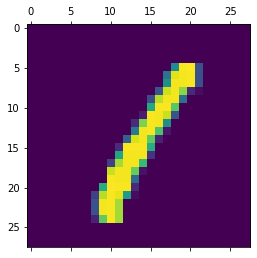

In [3]:
plt.matshow(x_train[3])

In [4]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train_flattened = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_flattened = x_test.reshape(x_test.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_flattened.shape

(10000, 784)

# First Simple Neural Network

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (x_train.shape[1]*x_train.shape[2],),activation = 'sigmoid')
])

# Understanding Weights
input = training size * input shape <br>
w = input shape * output size <br>
b =  1 * output size <br>
output = training size * output shape <br>

In [18]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-1.1704549e-02, -5.0780118e-02,  1.5211873e-02, ...,
         -6.6292420e-02,  3.1289175e-02, -3.9341390e-02],
        [ 8.4627591e-02, -8.3133854e-02, -4.6304751e-02, ...,
         -5.4716866e-02,  3.0382887e-02,  5.6488134e-02],
        [ 7.3500723e-04, -4.5272291e-02,  7.0910715e-02, ...,
          6.0732655e-02,  2.6413061e-02, -2.2773616e-02],
        ...,
        [-5.5090342e-02,  1.3758287e-02,  8.4543668e-02, ...,
         -1.8616349e-02,  7.9660557e-02, -6.4900845e-02],
        [ 2.3078367e-02,  6.5249555e-02, -5.9517749e-02, ...,
         -2.2416264e-02, -1.2848556e-02, -9.7826123e-05],
        [ 1.8156134e-02,  5.2639984e-02, -5.5911012e-02, ...,
         -8.0217272e-03, -2.0844959e-02, -7.8808650e-02]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(
    optimizer = 'adam',
    loss =  'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [24]:
model.fit(x_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2024 - accuracy: 0.7759
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1836 - accuracy: 0.7784
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1164 - accuracy: 0.7824
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1081 - accuracy: 0.7686
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1315 - accuracy: 0.7737


As we can see accuracy is low.

# Scaling Values

In [26]:
x_train_flattened = x_train_flattened/255

In [27]:
model.fit(x_train_flattened,y_train,epochs = 4)

Epoch 1/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4882 - accuracy: 0.8924
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3659 - accuracy: 0.9069
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3192 - accuracy: 0.9157
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2933 - accuracy: 0.9193


# Predicting for test set

In [38]:
y_train_predicted = model.predict(x_train_flattened)

In [44]:
y_test_predicted = model.predict(x_test_flattened)
prediction = [np.argmax(i) for i in y_test_predicted]
prediction[0]

7

# Creating Confusion Matrix

In [46]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test,predictions = prediction)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[980,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [648, 486,   0,   0,   0,   0,   0,   0,   1,   0],
       [846,   0, 184,   0,   0,   0,   1,   0,   1,   0],
       [884,   0,   0, 126,   0,   0,   0,   0,   0,   0],
       [683,   0,   0,   0, 297,   0,   0,   0,   0,   2],
       [866,   0,   0,   1,   0,  23,   0,   0,   1,   1],
       [798,   0,   0,   0,   1,   0, 159,   0,   0,   0],
       [506,   0,   0,   0,   1,   0,   0, 518,   0,   3],
       [967,   0,   0,   0,   0,   0,   0,   0,   7,   0],
       [918,   0,   0,   0,   0,   0,   0,   2,   0,  89]], dtype=int32)>

# Model with 1 hidden layer

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
     keras.layers.Dense(10,activation = 'sigmoid')
])

In [50]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [51]:
model.fit(x_train,y_train,epochs = 4)

Epoch 1/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2917 - accuracy: 0.9188
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1387 - accuracy: 0.9593
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0981 - accuracy: 0.9713
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0766 - accuracy: 0.9775
